Imports

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


sns.set(style="whitegrid")

Load Dataset

In [26]:
data = fetch_california_housing(as_frame=True)
df = data.frame


print("Dataset shape:", df.shape)
df.head()

Dataset shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Basic Exploration (EDA)

In [27]:
df.info()


df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Check Missing Values

In [28]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Correlation Heatmap

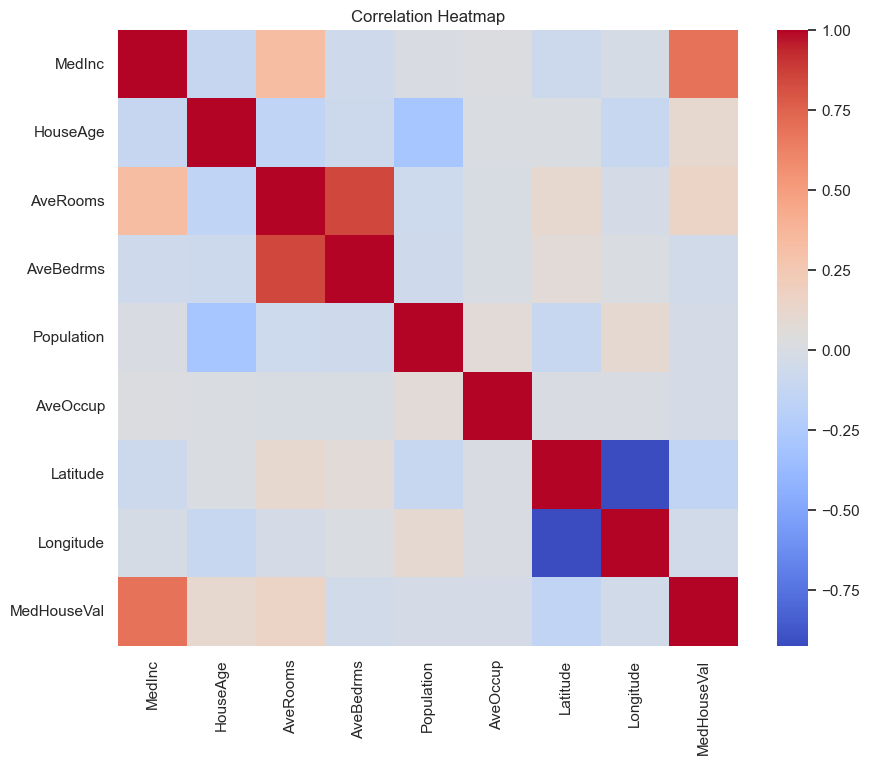

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Feature / Target Split

In [30]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

Train Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)


print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (16512, 8)
Testing set: (4128, 8)


Train Linear Regression Model

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predictions

In [33]:
y_pred = model.predict(X_test)

Evaluation Metrics

In [34]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print("MAE :", mae)
print("RMSE:", rmse)
print("R2 :", r2)

MAE : 0.5332001304956556
RMSE: 0.7455813830127763
R2 : 0.575787706032451


Actual vs Predicted Plot

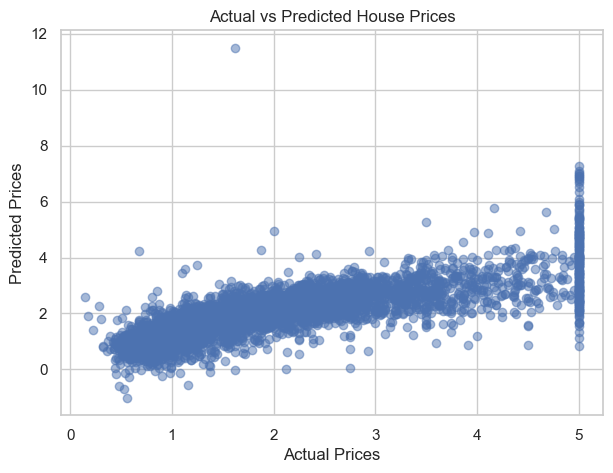

In [35]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

Residual Plot

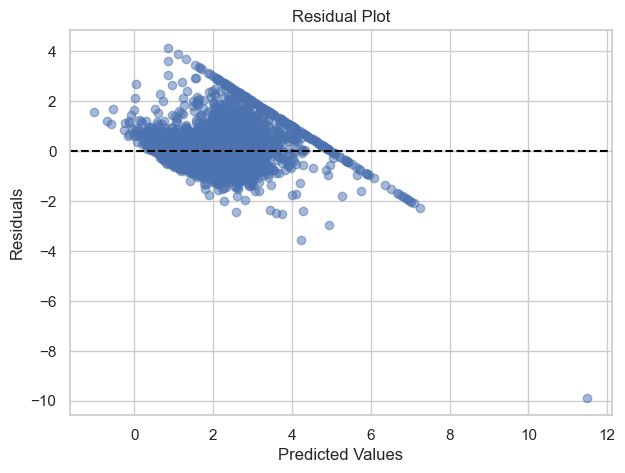

In [36]:
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Model Coefficients

In [37]:
coef_df = pd.DataFrame({
"Feature": X.columns,
"Coefficient": model.coef_
})


coef_df

,Feature,Coefficient
0,MedInc,0.448675
1,HouseAge,0.009724
2,AveRooms,-0.123323
3,AveBedrms,0.783145
4,Population,-0.000002
5,AveOccup,-0.003526
6,Latitude,-0.419792
7,Longitude,-0.433708


Save Model

In [38]:
joblib.dump(model, "linear_regression_california_housing.pkl")
print("Model saved as linear_regression_california_housing.pkl")

Model saved as linear_regression_california_housing.pkl


Sample Prediction on New Data

In [39]:
sample_input = X_test.iloc[0:1]
predicted_price = model.predict(sample_input)


print("Sample input:\n", sample_input)
print("Predicted house value:", predicted_price[0])

Sample input:
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   

       Longitude  
20046    -119.01  
Predicted house value: 0.7191228416019086
